In [102]:
from csv import reader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ee
import geemap

ee.Initialize()

In [103]:
"""
csv header legend:
-0:  Mininum Longitude
-1:  Minimum Latitude
-2:  Maximum Longitude
-3:  Maximum Latitude
-4:  Percent Vegetation Loss
-5:  Percent Bare Initial
-6:  Percent Significant VH Values
-7:  Average NIR/G
-8:  Average SWIR1/B
-9:  NASA Elev
-10: GEDI Elev
-11: Elev Loss
-12: GEDI Quality Flag
-13: B5
-14: B6
"""

'\ncsv header legend:\n-0:  Mininum Longitude\n-1:  Minimum Latitude\n-2:  Maximum Longitude\n-3:  Maximum Latitude\n-4:  Percent Vegetation Loss\n-5:  Percent Bare Initial\n-6:  Percent Significant VH Values\n-7:  Average NIR/G\n-8:  Average SWIR1/B\n-9:  NASA Elev\n-10: GEDI Elev\n-11: Elev Loss\n-12: GEDI Quality Flag\n-13: B5\n-14: B6\n'

In [105]:
# read the csv into an ndarray
with open('store/ray_compiled_with_bands.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    # next(csv_reader, None) # skip header
    results = np.array([[float(e) for e in row] for row in csv_reader]) # cut off last col (pass/fail)
    
with open('store/mojave_compiled.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    # next(csv_reader, None) # skip header
    results2 = np.array([[float(e) for e in row] for row in csv_reader]) # cut off last col (pass/fail)

In [205]:
row1 = results#[:40]

print(len(results))

left = [r[0] for r in row1]
b5 = [r[13] for r in row1]
b6 = [r[14] for r in row1]
DIFF = [b2-b1 for b1, b2 in zip(b5, b6)]
print(len(DIFF))
print(sorted(DIFF)[-40:])

1600
1600
[0.190707538651858, 0.19110699389602626, 0.19131622886190042, 0.19133262258783218, 0.19153473242826302, 0.19164260925697849, 0.19167377150249362, 0.19187427844662788, 0.1919175986820122, 0.19206150264081157, 0.19226862653067908, 0.19268345459263875, 0.19311041442270205, 0.19353230558428342, 0.19388662830163528, 0.19466321348267557, 0.1950100253830486, 0.19561604787270692, 0.1956241816916472, 0.19596382688752007, 0.19623918692620435, 0.19705510140812338, 0.19716527338398476, 0.1971797698330277, 0.19765074892813106, 0.19774077631382958, 0.19805598238867303, 0.19805871551687376, 0.1982659151005334, 0.19858803911891137, 0.19861209998477677, 0.1993023653640008, 0.19992443095982282, 0.20097005830283332, 0.20148733714745276, 0.20336231571561814, 0.20507544940376976, 0.20865443313676377, 0.210064480283788, 0.2102739591608643]


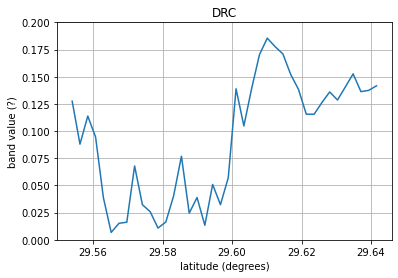

In [195]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(left, [b2-b1 for b1, b2 in zip(b5, b6)])
# ax.plot(left, b5)
# ax.plot(left, b6)

ax.set(xlabel='latitude (degrees)', ylabel='band value (?)',
       title='DRC')
ax.grid()
ax.set_ylim([0, 0.2])

plt.show()

In [124]:
g2 = ee.Geometry.Polygon(
        [[[29.554, 3.159],
          [29.554, 3.156754072536685],
          [29.556245836450024, 3.156754072536685],
          [29.556245836450024, 3.159]]])

# 29.554 3.156754072536685 29.556245836450024 3.159
#-115.788 35.271750296762676 -115.7857516959852 35.274
#-115.788 35.2717508054113 -115.78524442528285 35.274

g = ee.Geometry.Polygon(
        [[[-115.788, 35.274],
          [-115.788, 35.271750296762676],
          [-115.78524442528285, 35.271750296762676],
          [-115.78524442528285, 35.274]]])

p1 = ee.Geometry.Point([29.554, 3.159])
p2 = ee.Geometry.Point([29.556245836450024, 3.159])
p3 = p2.buffer(250).getInfo()['coordinates'][0]

# print(p3)

p11 = ee.Geometry.Point([-115.788, 35.274])
p22 = ee.Geometry.Point([-115.549, 35.274])

print(p1.distance(p2).getInfo())
print(p11.distance(p22).getInfo()/100000)


249.62801688340076
0.2174488860697426


In [208]:
row11 = results2#[132:155]

left = [r[0] for r in row11]
b51 = [r[13] for r in row11]
b61 = [r[14] for r in row11]

DIFF = [b2-b1 for b1, b2 in zip(b51, b61)]
print(sorted(DIFF)[-40:])

# t = np.arange(0.0, 2.0, 0.01)
# s = 1 + np.sin(2 * np.pi * t)

# fig, ax = plt.subplots()
# ax.plot(left, [b2-b1 for b1, b2 in zip(b51, b61)])
# # ax.plot(left, b51)
# # ax.plot(left, b61)

# ax.set(xlabel='latitude (degrees)', ylabel='band value (?)',
#        title='Mojave')
# ax.grid()
# ax.set_ylim([0, 0.05])

# plt.show()

[0.023332233473722264, 0.023375385724935527, 0.023444635972805605, 0.02348405920747132, 0.023508817367377366, 0.023548761382441774, 0.023566142823605307, 0.023581639780451247, 0.023609353695107693, 0.02365419920636791, 0.023669036964904744, 0.023671894352171652, 0.023775341745878087, 0.023796706677754798, 0.023864422351108194, 0.023873701844428274, 0.023877828024677417, 0.023911195058502477, 0.024049710923459977, 0.02405960432629911, 0.024098382999892642, 0.024108348762643284, 0.024139889821577498, 0.02423339085374837, 0.02423585621296115, 0.02424245860150015, 0.024374738477577484, 0.02438859100949803, 0.0244039519458914, 0.02449381616605928, 0.024539696644406972, 0.02463432834867768, 0.024816441597092398, 0.024822918306844965, 0.025003850425778018, 0.025034704120050544, 0.025045127076884943, 0.025137089399017987, 0.02533581469158469, 0.02641364246982475]
